<a href="https://colab.research.google.com/github/surekaj/dbda05/blob/master/Demo_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded =  files.upload()

Saving BreastCancer.csv to BreastCancer.csv


In [6]:
import pandas as pd
import io
df=pd.read_csv(io.BytesIO(uploaded['BreastCancer.csv']))
df.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [0]:
dum_cancer = pd.get_dummies(df, drop_first=True)

X = dum_cancer.iloc[:,1:-1]
y = dum_cancer.iloc[:,-1]


In [0]:
# import warnings filter to ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
import pandas as pd
import numpy as np

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2019,
                                                    stratify=y)
svc = SVC(probability = True)
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[132   6]
 [  0  72]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       138
           1       0.92      1.00      0.96        72

    accuracy                           0.97       210
   macro avg       0.96      0.98      0.97       210
weighted avg       0.97      0.97      0.97       210

0.9714285714285714


In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = svc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

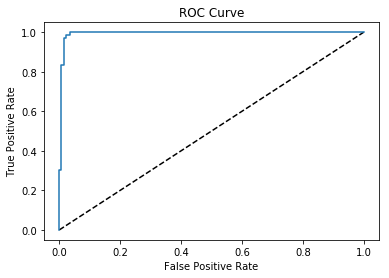

0.9933574879227053

In [13]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

In [14]:
######## Tunning for RBF ##################
from sklearn.model_selection import GridSearchCV

#C_range = np.linspace(0.01,4,20)
C_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])
#gamma_range = np.logspace(-9, 3, 13)
gamma_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])

param_grid = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, train_size=2, test_size=None, random_state=42)

svc = SVC(probability = True, kernel='rbf')
svmGrid = GridSearchCV(svc, param_grid=param_grid, cv=5,
                       scoring='roc_auc')
svmGrid.fit(X, y)

# Best Parameters
print(svmGrid.best_params_)

print(svmGrid.best_score_)


{'C': 0.01, 'gamma': 0.01}
0.9920714237867623


In [15]:
######## Tunning for Linear ####################
#C_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])
C_range = np.linspace(0.5,4,10)

param_grid = dict(C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, train_size=2, test_size=None, random_state=42)
svc = SVC(probability=True, kernel='linear')
svmGrid = GridSearchCV(svc, param_grid=param_grid, cv=5,
                       scoring='roc_auc')
svmGrid.fit(X, y)

# Best Parameters
print(svmGrid.best_params_)

print(svmGrid.best_score_)

{'C': 0.5}
0.9941065261804072


In [16]:
############ Tunning for Sigmoid ###################

#C_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])
C_range = np.linspace(1,10,15)
#Coef0_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])
Coef0_range = np.linspace(1,10,15)

param_grid = dict(C=C_range,coef0 = Coef0_range )

svc = SVC(probability=True, kernel='sigmoid')
svmGrid = GridSearchCV(svc, param_grid=param_grid, cv=5,
                       scoring='roc_auc')
svmGrid.fit(X, y)

# Best Parameters
print(svmGrid.best_params_)

print(svmGrid.best_score_)



{'C': 4.214285714285714, 'coef0': 10.0}
0.007129511545480676
